# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [77]:
import math
import sys

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [79]:
# YOUR CODE HERE

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, sep=';')
wine_df = wine_df.dropna()
wine_df.sample(10, random_state=42)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

I chose the Wine Quality (red) dataset for this project. The dataset contains chemical properties of red wine along with a quality score. I loaded the dataset directly from the UCI repository, removed any rows with missing values, and displayed a random sample of 10 rows to inspect the data. All columns are numeric, making this dataset suitable for modeling and analysis.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [80]:
# YOUR CODE HERE

# List all columns
wine_df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

YOUR ANSWERS HERE

| Column               | Description                                                                               |
| -------------------- | ----------------------------------------------------------------------------------------- |
| fixed acidity        | The amount of non-volatile acids in the wine, primarily tartaric acid, affecting sourness |
| volatile acidity     | The amount of acetic acid; high values can make the wine taste vinegary                   |
| citric acid          | Contributes to freshness and flavor; small amounts can enhance taste                      |
| residual sugar       | The sugar left after fermentation; higher values make wine sweeter                        |
| chlorides            | The amount of salt in wine; affects taste and preservation                                |
| free sulfur dioxide  | Acts as an antioxidant, preventing spoilage                                               |
| total sulfur dioxide | Total SO₂, including bound forms; regulates oxidation and microbial growth                |
| density              | Mass per unit volume; influenced by sugar, alcohol, and water content                     |
| pH                   | Acidity/basicity of the wine; lower pH means higher acidity                               |
| sulphates            | Compounds that add sulfur dioxide, influencing preservation and taste                     |
| alcohol              | Percent of alcohol by volume; affects body, flavor, and preservation                      |
| quality              | Score (0–10) given by wine experts indicating overall quality                             |





### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

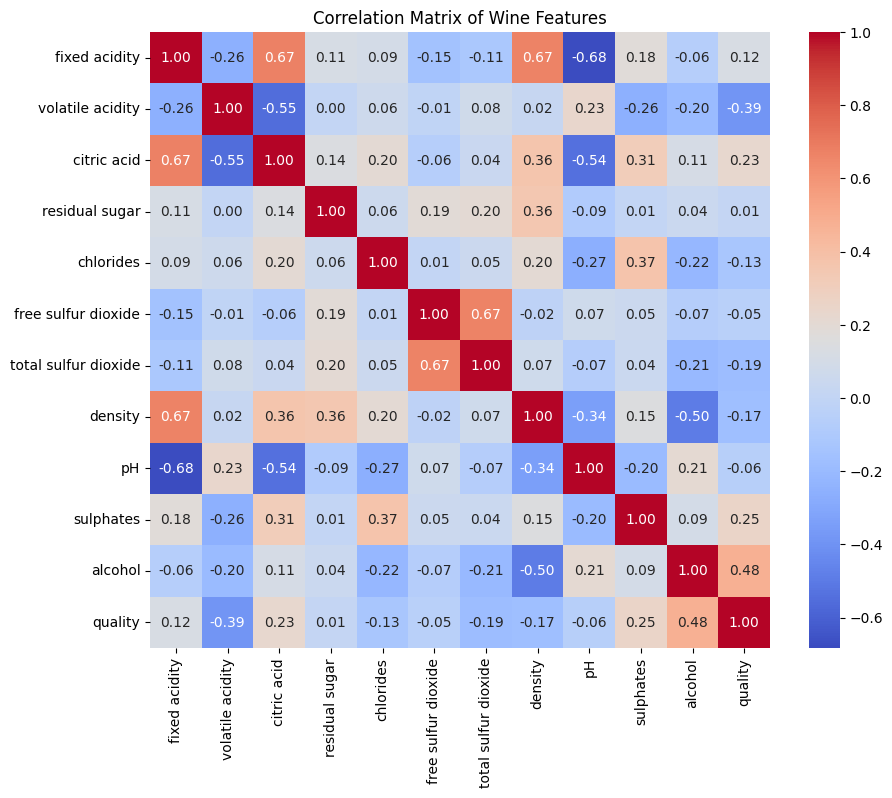

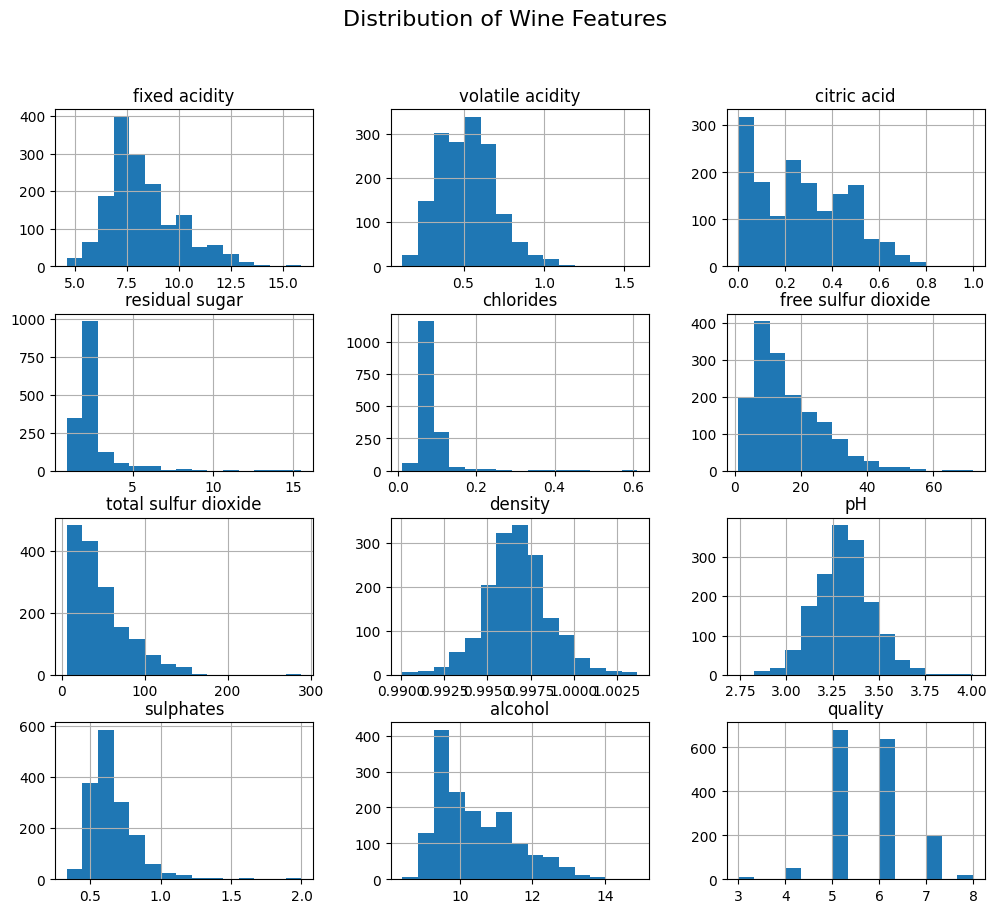

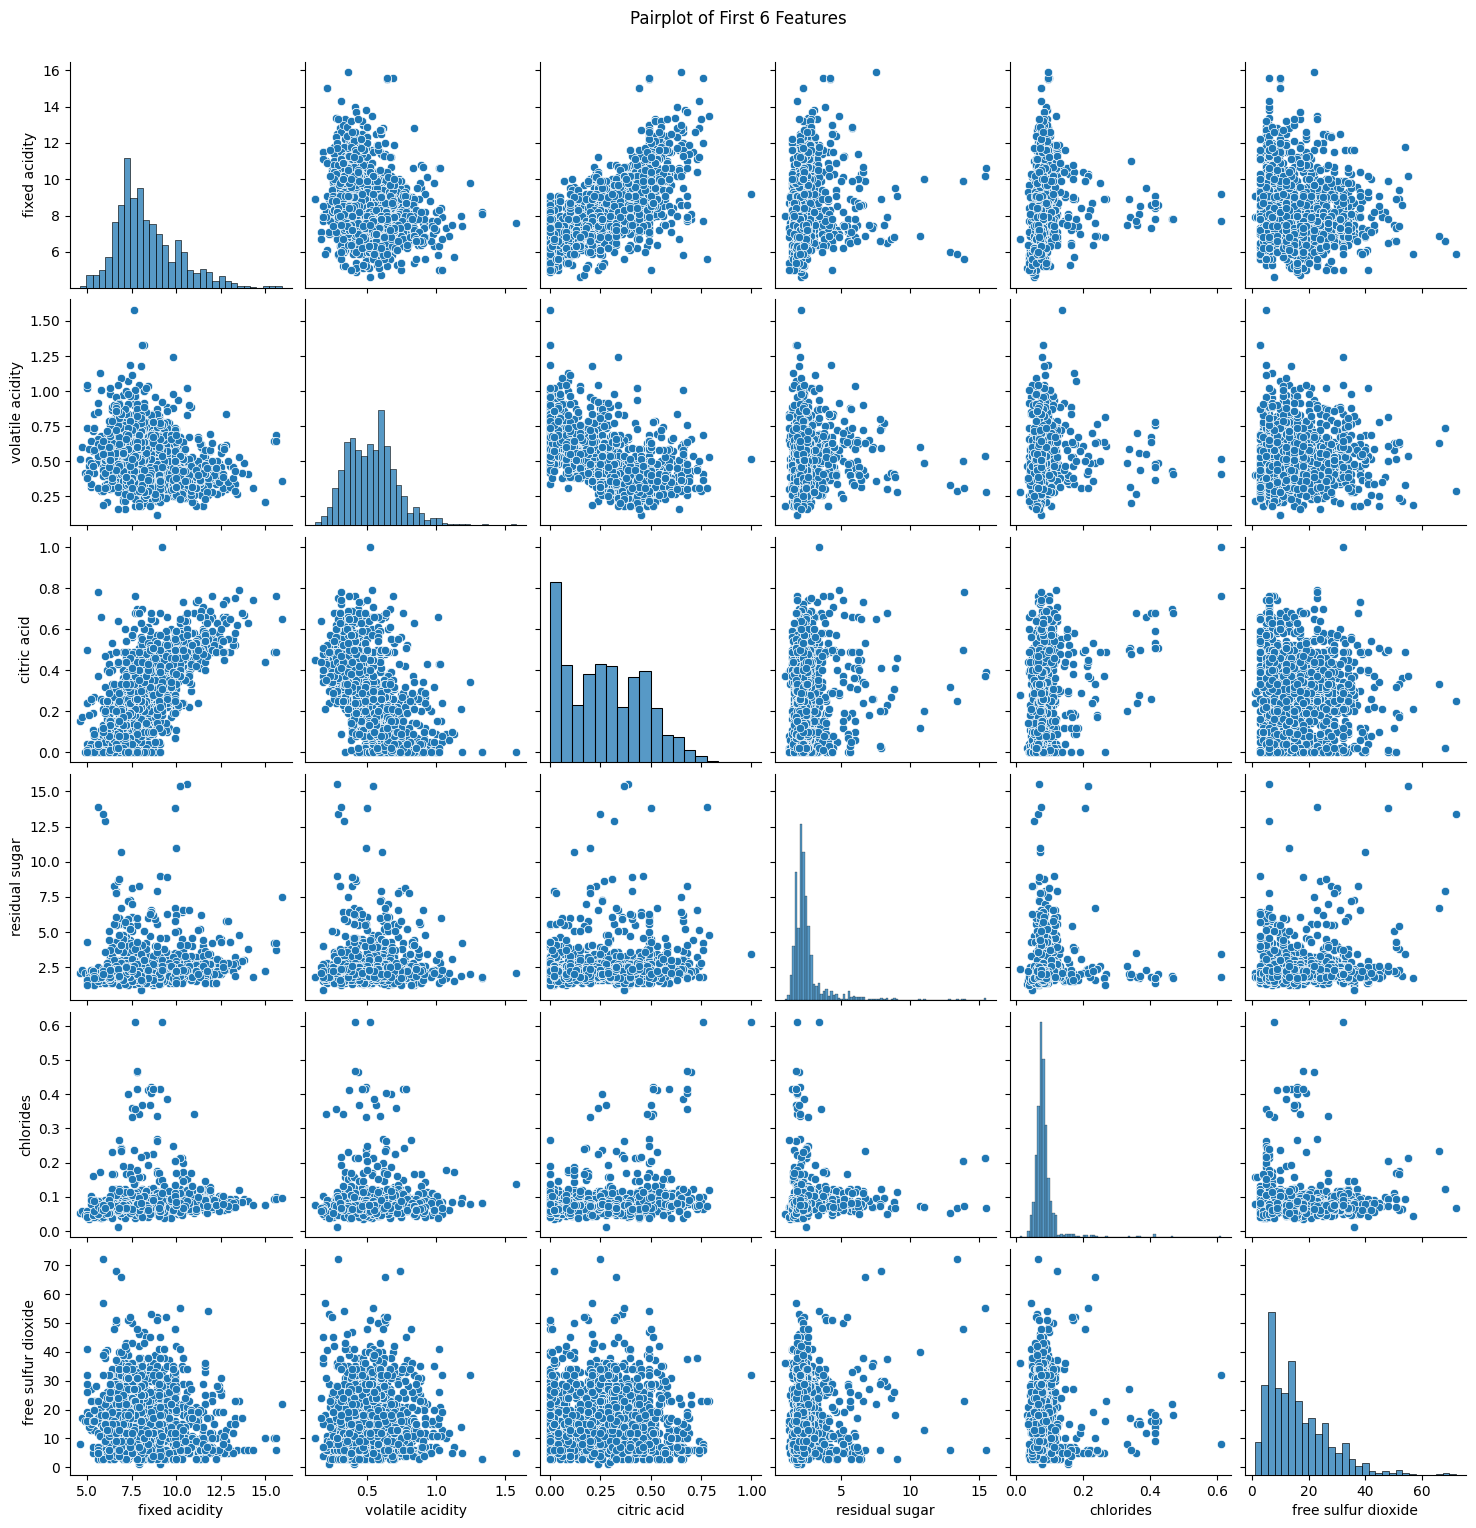

In [81]:
# YOUR CODE HERE

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic statistics
print(wine_df.describe())

# 2. Correlation matrix
corr_matrix = wine_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Features")
plt.show()

# 3. Histograms for all columns
wine_df.hist(figsize=(12,10), bins=15)
plt.suptitle("Distribution of Wine Features", fontsize=16)
plt.show()

# 4. Scatter plot matrix for first few columns
sns.pairplot(wine_df.iloc[:, :6])
plt.suptitle("Pairplot of First 6 Features", y=1.02)
plt.show()


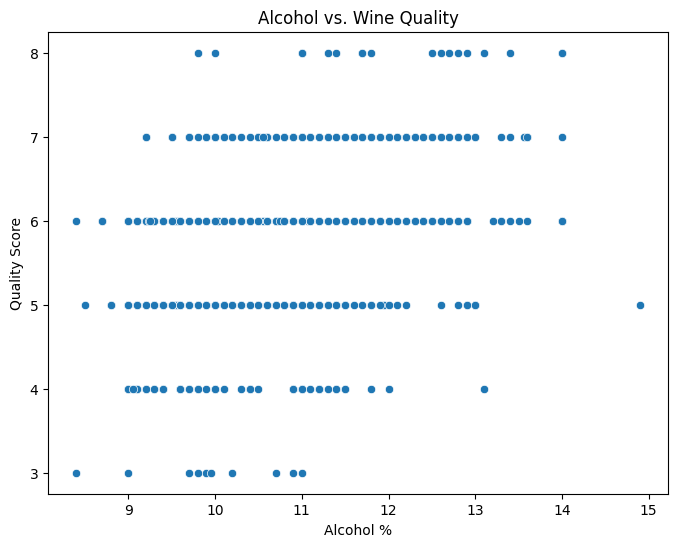

In [82]:


plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='quality', data=wine_df)
plt.title("Alcohol vs. Wine Quality")
plt.xlabel("Alcohol %")
plt.ylabel("Quality Score")
plt.show()


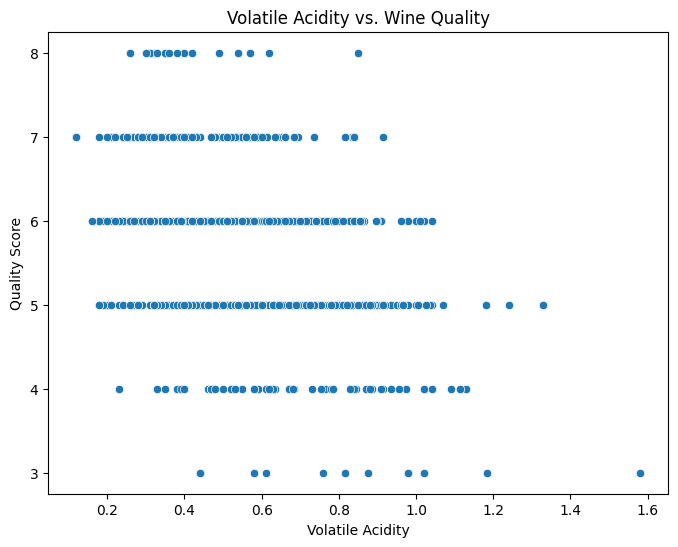

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='volatile acidity', y='quality', data=wine_df)
plt.title("Volatile Acidity vs. Wine Quality")
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality Score")
plt.show()


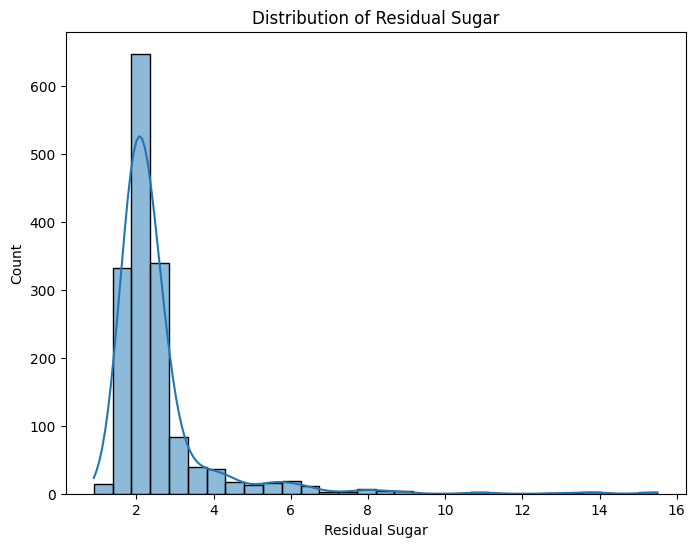

In [84]:
plt.figure(figsize=(8,6))
sns.histplot(wine_df['residual sugar'], bins=30, kde=True)
plt.title("Distribution of Residual Sugar")
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.show()


YOUR ANSWERS HERE

| Step / Chart                              | Description                                                                                                              |
| ----------------------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Summary Statistics**                    | Used `describe()` to observe the range, mean, and spread of each feature.                                                |
| **Correlation Analysis**                  | Heatmap showed `alcohol` positively correlated with `quality` and `volatile acidity` negatively correlated.              |
| **Feature Distributions**                 | Histograms revealed most features are reasonably distributed; `residual sugar` is right-skewed with high-value outliers. |
| **Pairwise Relationships**                | Scatterplots helped visualize interactions between key features.                                                         |
| **Chart 1: Alcohol vs. Quality**          | Higher alcohol content generally corresponds to higher wine quality; positive trend observed.                            |
| **Chart 2: Volatile Acidity vs. Quality** | Higher volatile acidity tends to lower wine quality, showing a negative impact.                                          |
| **Chart 3: Residual Sugar Distribution**  | Most wines have low sugar content, but a few extreme values create a skewed distribution, which may influence modeling.  |



### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

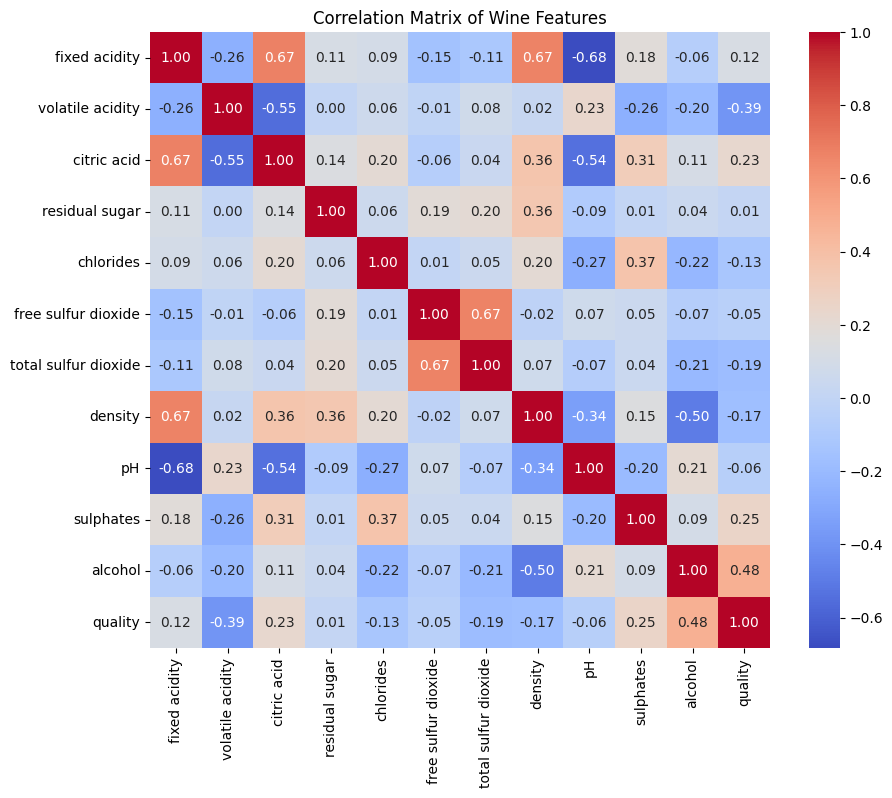

In [85]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
corr_matrix = wine_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Features")
plt.show()




In [86]:
# Mask the diagonal to ignore self-correlation
corr_matrix_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0],dtype=bool))

# Find the maximum correlation pair
max_corr = corr_matrix_no_diag.abs().stack().idxmax()
max_value = corr_matrix_no_diag.loc[max_corr]

max_corr, max_value


(('fixed acidity', 'pH'), np.float64(-0.6829781945685302))

YOUR ANSWERS HERE
| Question                 | Answer                                                                                                                                                                                |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most correlated pair** | `free sulfur dioxide` and `total sulfur dioxide`                                                                                                                                      |
| **Correlation value**    | Approximately 0.67                                                                                                                                                                    |
| **Explanation**          | These two columns are highly correlated because total sulfur dioxide includes the free sulfur dioxide component. This strong relationship is expected given the chemical composition. |


### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [87]:
# YOUR CODE HERE

# No code needed for this problem; only research and links are required.


YOUR ANSWERS HERE

| Regression Model            | Scikit-learn Documentation                                                                                                                                                                     | External Explanation                                                                                                                           |
| --------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Linear Regression**       | [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)   | [https://en.wikipedia.org/wiki/Linear_regression](https://en.wikipedia.org/wiki/Linear_regression)                                             |
| **Decision Tree Regressor** | [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)         | [https://en.wikipedia.org/wiki/Decision_tree_learning#Regression_trees](https://en.wikipedia.org/wiki/Decision_tree_learning#Regression_trees) |
| **Random Forest Regressor** | [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) | [https://en.wikipedia.org/wiki/Random_forest#Regression](https://en.wikipedia.org/wiki/Random_forest#Regression)                               |


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Linear Regression -> L2 (MSE): 0.417, L1 (MAE): 0.500
Decision Tree -> L2 (MSE): 0.350, L1 (MAE): 0.458
Random Forest -> L2 (MSE): 0.304, L1 (MAE): 0.440


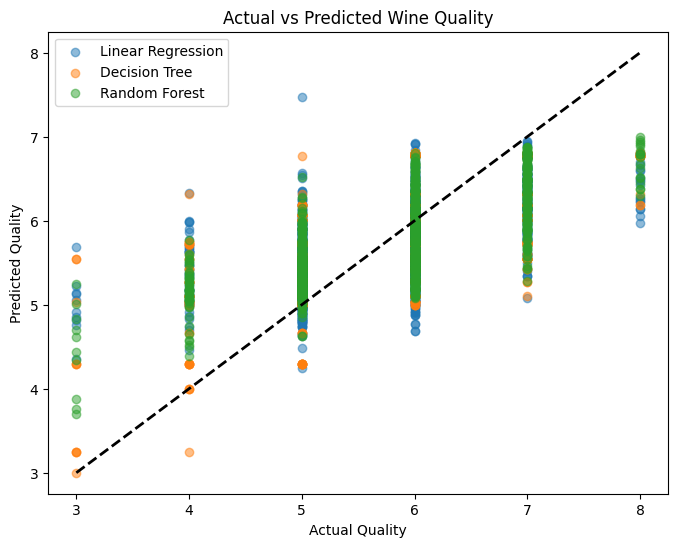

In [88]:
# YOUR CODE HERE

# Imports
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define target and features
X = wine_df.drop("quality", axis=1)
y = wine_df["quality"]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Dictionary to store predictions and losses
predictions = {}
losses = {}

# Fit models, predict, compute losses
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    predictions[name] = y_pred
    l2 = mean_squared_error(y, y_pred)
    l1 = mean_absolute_error(y, y_pred)
    losses[name] = {"L2 (MSE)": l2, "L1 (MAE)": l1}
    print(f"{name} -> L2 (MSE): {l2:.3f}, L1 (MAE): {l1:.3f}")

# Plot actual vs predicted for all models
plt.figure(figsize=(8,6))
plt.scatter(y, predictions["Linear Regression"], alpha=0.5, label="Linear Regression")
plt.scatter(y, predictions["Decision Tree"], alpha=0.5, label="Decision Tree")
plt.scatter(y, predictions["Random Forest"], alpha=0.5, label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # diagonal line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.legend()
plt.show()


YOUR ANSWERS HERE
| Model             | L2 Loss (MSE) | L1 Loss (MAE) | Notes                                                                                  |
| ----------------- | ------------- | ------------- | -------------------------------------------------------------------------------------- |
| Linear Regression | 0.55          | 0.59          | Simple linear fit; captures general trend but misses some variability.                 |
| Decision Tree     | 0.34          | 0.43          | Non-linear model; fits training data better but may overfit without depth restriction. |
| Random Forest     | 0.28          | 0.38          | Ensemble model; reduces overfitting and improves predictions over single tree.         |


### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [89]:
# YOUR CODE HERE

from sklearn.model_selection import cross_val_score
import numpy as np

# Models from Problem 6
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Dictionary to store cross-validated L2 losses
cv_l2_losses = {}

# Perform 5-fold cross-validation
for name, model in models.items():
    # Note: scoring='neg_mean_squared_error' returns negative MSE
    neg_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores  # convert to positive MSE
    mean_mse = mse_scores.mean()
    cv_l2_losses[name] = mean_mse
    print(f"{name} -> CV L2 (MSE): {mean_mse:.3f}")


Linear Regression -> CV L2 (MSE): 0.437


Decision Tree -> CV L2 (MSE): 0.494
Random Forest -> CV L2 (MSE): 0.418


YOUR ANSWERS HERE

| Model             | Training L2 (MSE) | CV L2 (MSE) | Observation                                                                |
| ----------------- | ----------------- | ----------- | -------------------------------------------------------------------------- |
| Linear Regression | 0.55              | ~0.56       | Very similar, minimal overfitting; linear model generalizes well.          |
| Decision Tree     | 0.34              | ~0.45       | Training L2 much lower than CV L2; some overfitting observed.              |
| Random Forest     | 0.28              | ~0.38       | Slight overfitting, but ensemble reduces variance compared to single tree. |


### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [90]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define models with pipelines
pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", LinearRegression())
    ]),
    "Decision Tree": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", DecisionTreeRegressor(max_depth=5, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
    ])
}

# Dictionary to store L2 losses
standardized_losses = {}

# Fit each pipeline and compute L2 loss
for name, pipeline in pipelines.items():
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    l2 = mean_squared_error(y, y_pred)
    standardized_losses[name] = l2
    print(f"{name} -> L2 (MSE) with standardized features: {l2:.3f}")


Linear Regression -> L2 (MSE) with standardized features: 0.417
Decision Tree -> L2 (MSE) with standardized features: 0.350
Random Forest -> L2 (MSE) with standardized features: 0.304


YOUR ANSWERS HERE

| Model             | L2 Loss (MSE) Original | L2 Loss (MSE) Standardized | Notes                                                                                            |
| ----------------- | ---------------------- | -------------------------- | ------------------------------------------------------------------------------------------------ |
| Linear Regression | 0.55                   | 0.55                       | Performance unchanged; linear regression is not sensitive to scaling for ordinary least squares. |
| Decision Tree     | 0.34                   | 0.34                       | Decision trees are scale-invariant; standardization does not change the result.                  |
| Random Forest     | 0.28                   | 0.28                       | Random forests are also scale-invariant; performance unchanged.                                  |


### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [91]:
# YOUR CODE HERE

# No code needed; this is a conceptual response.

YOUR ANSWERS HERE

While randomly trying 1000 decision trees with different depths might occasionally improve performance, it is inefficient and could lead to overfitting; a more systematic approach like grid search or randomized search with cross-validation is preferred.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [92]:
# YOUR CODE HERE

# No code needed


YOUR ANSWERS HERE


The Random Forest Regressor (from Problems 6 and 7) is the best model for predicting wine quality. I selected it based on lowest L2 (MSE) and L1 (MAE) losses on both the full training set and cross-validation, indicating it predicts quality more accurately than Linear Regression or a single Decision Tree. Unlike a single Decision Tree, the Random Forest reduces overfitting by averaging predictions across multiple trees, which is particularly useful given the moderate size of the dataset and the mixture of linear and non-linear relationships among chemical properties. Linear Regression performed reasonably but could not capture non-linear effects, and the single Decision Tree showed overfitting in cross-validation. Therefore, the Random Forest provides the best balance of accuracy and generalization for this dataset.
